<a href="https://colab.research.google.com/github/mavela/RF_feature_importance/blob/master/RF_feature_importance_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import gzip
import numpy as np
import re
from sklearn.metrics import classification_report
import sklearn.feature_extraction
import json
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston


In [ ]:
import pandas as pd 
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)



In [ ]:
from matplotlib import pyplot as plt
perm_importance = permutation_importance(rf, X_test, y_test)
print("perm_imortance", perm_importance)
sorted_idx = perm_importance.importances_mean.argsort()
print("sorted", sorted_idx)
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx]) # change color
plt.xlabel("Permutation importance")

In [14]:
print(boston.feature_names[sorted_idx])
print(boston.feature_names)

['CHAS' 'RAD' 'ZN' 'B' 'INDUS' 'AGE' 'DIS' 'TAX' 'CRIM' 'PTRATIO' 'NOX'
 'RM' 'LSTAT']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


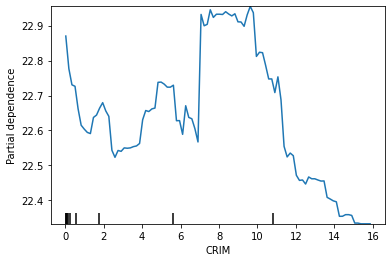

In [15]:
from sklearn.inspection import PartialDependenceDisplay

#features = [0, 1, (0, 1)]
features = [0]
PartialDependenceDisplay.from_estimator(rf, X, features)

In [29]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(rf.score(X,y)) #this is accuracy

print(classification_report(y_test, y_pred))


0.9933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Text(0.5, 0, 'Permutation importance')

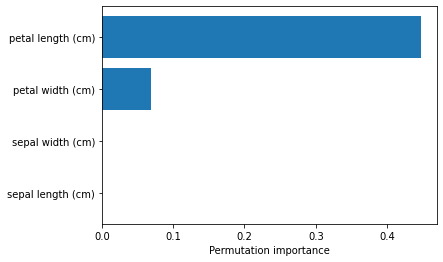

In [39]:
perm_importance = permutation_importance(rf, X_test, y_test)
#print("perm_imortance", perm_importance)
sorted_idx = perm_importance.importances_mean.argsort()
#print("sorted", sorted_idx)
irisnames_array = np.array(iris.feature_names)
plt.barh(irisnames_array[sorted_idx], perm_importance.importances_mean[sorted_idx]) # change color
plt.xlabel("Permutation importance")

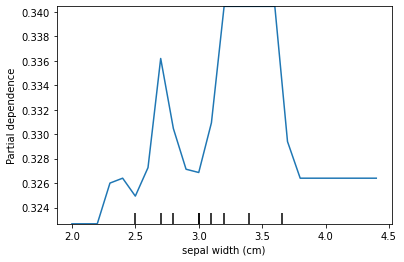

In [43]:
from sklearn.inspection import PartialDependenceDisplay
# ks https://scikit-learn.org/stable/modules/partial_dependence.html

#features = [0, 1, (0, 1)]
features = [1]
PartialDependenceDisplay.from_estimator(rf, X, features, target=1) # target on luokkanumero